In [47]:
import pandas as pd
import  statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("C:/Users/Dell/Downloads/stock_prices.csv")
df.head(5)

,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000


0) Convert the Date column to datetime dtype and make the index.

In [38]:
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d" )

In [39]:
df = df.set_index('Date')
df.head(2)

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999


1) Resample the data as business days "B".

In [40]:
ts = df['Closing Price'].copy()
resampled_df = ts.resample("B").asfreq()

resampled_df.head()

Date
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
Freq: B, Name: Closing Price, dtype: float64

2) Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

In [41]:
resampled_df.isnull().sum()

45

In [42]:
resampled_df = resampled_df.fillna(method='ffill')
resampled_df.isnull().sum()

0

3) Visualize the time series.

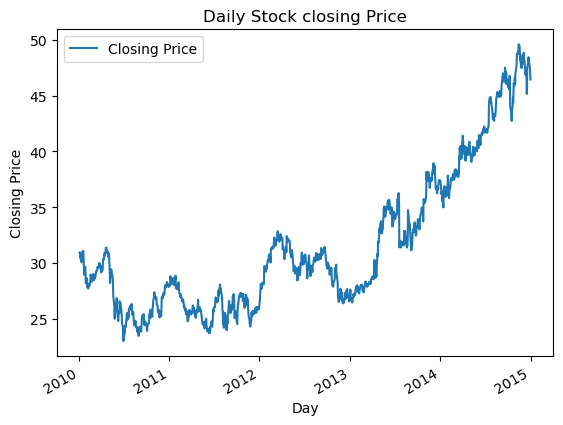

In [43]:
ax = df.plot()
ax.set(ylabel="Closing Price", xlabel="Day", title="Daily Stock closing Price");

5) Check for stationarity with the Ad Fuller Test.

In [44]:
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): 
    
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [45]:
adfuller_results = get_adfuller_results(resampled_df, label='Closing Price')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Closing Price,-0.10329,0,1302,0.94911,0.05,False


The raw is not stationary 

6) Check for autocorrelation with an ACF plot.

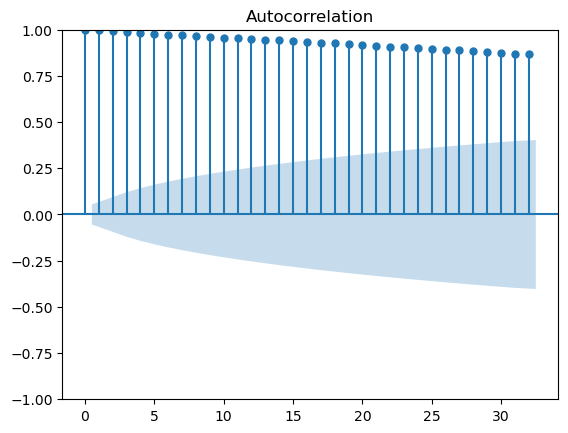

In [46]:
fig = tsa.graphics.plot_acf(resampled_df)

There is a significant correlation

7) Difference the data once.

In [48]:
ts_diff = resampled_df.diff().dropna()
ts_diff.head()

Date
2010-01-05    0.009998
2010-01-06   -0.189999
2010-01-07   -0.320000
2010-01-08    0.209999
2010-01-11   -0.389999
Freq: B, Name: Closing Price, dtype: float64

8) Visualize the differenced data.

<Axes: xlabel='Date'>

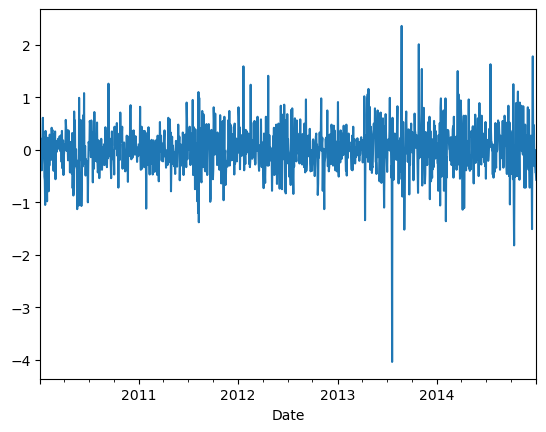

In [49]:
ts_diff.plot()

9) Check the differenced data for stationarity with the Ad Fuller Test.

In [50]:
adfuller_results = get_adfuller_results(ts_diff, label='Difference')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Difference,-35.778578,0,1301,0.0,0.05,True


The Difference is stationary

10) Check the differenced data for autocorrelation with an ACF Plot.

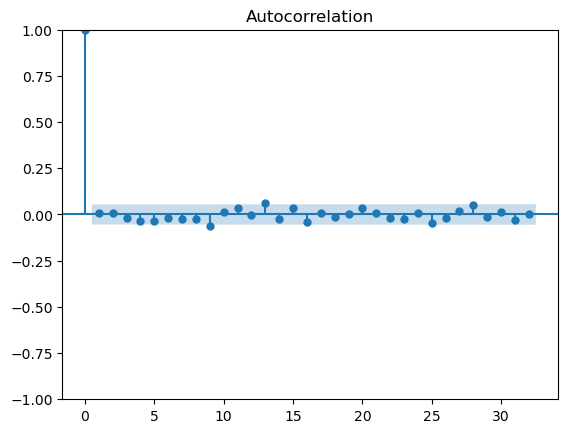

In [51]:
fig = tsa.graphics.plot_acf(ts_diff)

There is no significant autocorrelation